In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render ul li{font-size:22pt; line-height:30px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

In [2]:
import numpy as np
import pandas as pd # read_csv, get_dummies, crosstab
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, save_model,load_model
from tensorflow.keras.layers import Input, Dense, Dropout, LeakyReLU
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica



[데이터셋 정보]
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

클래스 분포:
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

원핫인코딩 결과:
   setosa  versicolor  virginica
0       1           0          0
1       1           0          0
2       1           0          0
3       1           0          0
4       1           0          0

[데이터셋 분리 결과]
X_train shape: (120, 4), Y_train shape: (120, 3)
X_test shape: (30, 4), Y_test shape: (30, 3)

[모델 구조]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)

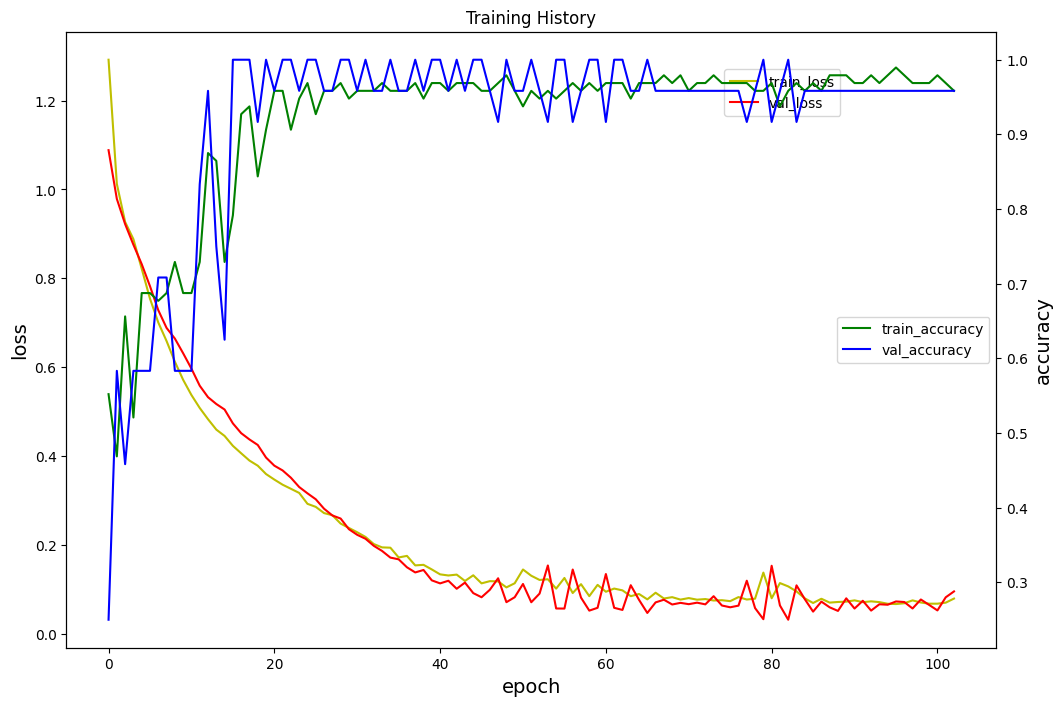


[현재 모델 평가]
loss: 0.0580, accuracy: 1.0000

[저장된 최고 모델 로드 및 평가]
모델 파일: wine.h5


ValueError: in user code:

    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\keras\engine\training.py", line 1665, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 11), found shape=(None, 4)


In [4]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render ul li{font-size:22pt; line-height:30px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, LeakyReLU
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터셋 생성(seaborn) & 전처리
# seaborn의 iris 데이터셋 로드 (4개 특성, 3개 클래스)
iris = sns.load_dataset('iris')
print("\n[데이터셋 정보]")
print(iris.head())
print("\n클래스 분포:")
print(iris['species'].value_counts())

# X, y 분리
X = iris.drop('species', axis=1).values  # (150, 4)
y = iris['species'].values  # (150,)

# 원핫인코딩
Y = pd.get_dummies(y).to_numpy()
print("\n원핫인코딩 결과:")
print(pd.get_dummies(y).head())

# train과 test셋 분리(8:2)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,  # 8:2 비율
    stratify=Y,     # 클래스 균형 유지
    random_state=42
)
print("\n[데이터셋 분리 결과]")
print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}")

# 2. 모델 구성(입력4 ->출력3, layers:4->64->128->50->30->3)
model = Sequential()
model.add(Input(shape=(4,)))  # 입력층: 4개 특성
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=3, activation='softmax'))  # 출력층: 3개 클래스

print("\n[모델 구조]")
model.summary()

# 3. 모델 학습 과정 설정
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# 4. 모델 학습(EarlyStopping, ModelCheckpoint 추가)
# CustomHistory 콜백 클래스 정의
class CustomHistory(Callback):
    def __init__(self):
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if (self.epoch % 5 == 0) | (self.epoch == 1):
            print('{}번째 loss:{:.4f}, acc:{:.4f}, val_loss:{:.4f}, val_acc:{:.4f}'\
                  .format(self.epoch,
                         logs.get('loss'),
                         logs.get('accuracy'),
                         logs.get('val_loss'),
                         logs.get('val_accuracy')
                )
            )

# 모델 저장 폴더 생성
model_save_folder = './model/'
import os
if not os.path.exists(model_save_folder):
    os.mkdir(model_save_folder)

# 콜백 객체 설정
customHistory = CustomHistory()
checkpoint = ModelCheckpoint(
    filepath=model_save_folder + 'iris-{epoch:03d}-loss{val_loss:.4f}-acc{val_accuracy:.4f}.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=0
)
earlyStopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

print("\n[모델 학습 시작]")
hist = model.fit(
    X_train, Y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    verbose=0,
    callbacks=[earlyStopping, customHistory, checkpoint]
)

# 5. 모델 평가
# 학습 과정 시각화
print("\n[학습 과정 시각화]")
fig, loss_ax = plt.subplots(figsize=(12, 8))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch', fontsize=14)
loss_ax.set_ylabel('loss', fontsize=14)
acc_ax.set_ylabel('accuracy', fontsize=14)
loss_ax.legend(loc='upper left', bbox_to_anchor=(0.7, 0.95))
acc_ax.legend(loc='center right')
plt.title('Training History')
plt.show()

# 현재 모델 평가
print("\n[현재 모델 평가]")
loss_and_acc = model.evaluate(X_test, Y_test, batch_size=100, verbose=0)
print(f'loss: {loss_and_acc[0]:.4f}, accuracy: {loss_and_acc[1]:.4f}')

# 저장된 최고의 모델 평가 (가장 최근에 저장된 최고 성능 모델)
saved_models = sorted([f for f in os.listdir(model_save_folder) if f.endswith('.h5')])
if saved_models:
    best_model_path = os.path.join(model_save_folder, saved_models[-1])
    print(f"\n[저장된 최고 모델 로드 및 평가]")
    print(f"모델 파일: {saved_models[-1]}")
    best_model = load_model(best_model_path)
    loss_and_acc1 = best_model.evaluate(X_test, Y_test, verbose=0)
    print(f'loss: {loss_and_acc1[0]:.4f}, accuracy: {loss_and_acc1[1]:.4f}')
else:
    print("\n저장된 모델이 없습니다.")

# 교차표(혼동행렬) 생성
print("\n[혼동행렬 (Confusion Matrix)]")
real = Y_test.argmax(axis=1)
pred = model.predict(X_test).argmax(axis=1)
species_names = ['setosa', 'versicolor', 'virginica']
confusion_df = pd.crosstab(
    real, pred,
    rownames=['real'],
    colnames=['predict'],
    margins=False
)
confusion_df.index = species_names
confusion_df.columns = species_names
print(confusion_df)

# 6. 모델 예측/저장
# 단일 샘플 예측
print("\n[단일 샘플 예측 테스트]")
sample_data = X_test[0]  # 테스트셋 첫 번째 샘플
sample_prediction = model.predict(sample_data.reshape(1, -1), verbose=0)
predicted_class = sample_prediction.argmax(axis=1)[0]
predicted_species = species_names[predicted_class]
confidence = sample_prediction[0][predicted_class] * 100

print(f"입력 데이터: {sample_data}")
print(f"예측 클래스: {predicted_species} (인덱스: {predicted_class})")
print(f"예측 확신도: {confidence:.2f}%")

# 최종 모델 저장
final_model_path = model_save_folder + 'iris_final_model.h5'
model.save(final_model_path)
print(f"\n최종 모델이 저장되었습니다: {final_model_path}")